In [2]:
import numpy as np
from numpy import random
import random
import matplotlib.pyplot as plt
from scipy.signal import cwt,ricker
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers
from tensorflow.keras.layers import Input, Masking
from tensorflow.keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.layers import Flatten,concatenate,Layer,Dense,LSTM,TimeDistributed, Activation,MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D

In [5]:
random.seed(1313)

def Mean(data):
    return np.mean(data,axis=1)

def Std(data):
    return np.std(data,axis=1)

def Var(data):
    return np.var(data,axis=1)


In [197]:
random_data1 = (np.random.normal(10,3,60000)).reshape(2000,30,1)
random_data2 = (np.random.normal(30,10,40000)).reshape(2000,20,1)
random_data3 = (np.random.normal(50,10,120000)).reshape(3000,40,1)
random_data4 = (np.random.normal(70,25,25000)).reshape(1000,25,1)
random_data5 = (np.random.normal(100,40,100000)).reshape(2000,50,1)
random_data6 = (np.random.normal(40,10,20000)).reshape(2000,10,1)
random_data7 = (np.random.normal(300,50,800000)).reshape(10000,80,1)
random_data8 = (np.random.normal(600,100,200000)).reshape(10000,20,1)
random_data9 = (np.random.normal(500,100,200000)).reshape(10000,20,1)
random_data_stdweight = np.random.uniform(0,1000, size=(10000,50, 1))

# dd = np.concatenate( (random_data1,random_data2) )
# dd = np.concatenate( (dd,random_data3) )
# dd = np.concatenate( (dd,random_data4) )
# dd = np.concatenate( (dd,random_data5) )
# dd = np.concatenate( (dd,random_data6) )
# dd = np.concatenate( (dd,random_data7) )
# dd = np.concatenate( (dd,random_data8) )
# dd = np.concatenate( (dd,random_data9) )

#dd = tf.ragged.constant(random_data1, random_data2)

d1 = tf.ragged.constant(random_data1)
d2 = tf.ragged.constant(random_data2)
d3 =  tf.ragged.constant(random_data3)
d4 =  tf.ragged.constant(random_data4)
d5 =  tf.ragged.constant(random_data5)
d6 =  tf.ragged.constant(random_data6)


ddd = tf.concat([d1,d2,d3,d4,d5,d6],axis=0)


#np.random.shuffle(dd)
# f_mdd = Mean(dd)
# f_dd = Std(dd)
print(ddd.shape)

#f_dd = dd

# random_data1 = (np.random.normal(10,5,10000)).reshape(1000,10,1)
# random_data2 = (np.random.normal(50,50,10000)).reshape(1000,10,1)
# random_data3 = (np.random.normal(100,100,10000)).reshape(1000,10,1)
# random_data4 = (np.random.normal(500,200,10000)).reshape(1000,10,1)
# random_data5 = (np.random.normal(1000,200,10000)).reshape(1000,10,1)
# random_data6 = (np.random.normal(5000,1000,10000)).reshape(1000,10,1)
# random_data7 = (np.random.normal(10000,2500,10000)).reshape(1000,10,1)
# random_data8 = (np.random.normal(50000,5000,10000)).reshape(1000,10,1)
# random_data9 = (np.random.normal(100000,20000,10000)).reshape(1000,10,1)

#data = np.concatenate((random_data1,random_data2),axis=0)

(12000, None, None)


In [187]:
#random_data1 = (np.random.normal(1000,20,200000)).reshape(20000,10,1)

In [188]:
# random_data10 = (np.random.normal(1000900,800000,100000)).reshape(2000,50,1)
# feature_data10 = Mean(random_data10)
# plt.plot(np.random.normal(1000,10,200))

In [198]:
feature_data1 = Mean(random_data1)
feature_data2 = Mean(random_data2)
feature_data3 = Mean(random_data3)
feature_data4 = Mean(random_data4)
feature_data5 = Mean(random_data5)
feature_data6 = Mean(random_data6)
feature_data7 = Mean(random_data7)
feature_data8 = Mean(random_data8)
feature_data9 = Mean(random_data9)

f_mddd = tf.concat([feature_data1,feature_data2,feature_data3,feature_data4,feature_data5,feature_data6],axis=0)


# Mean LSTM Model

In [56]:
mean_LSTMmodel= None
mean_LSTMmodel = Sequential()


mean_LSTMmodel.add(Input(shape=[None, 1], ragged=True))
mean_LSTMmodel.add(LSTM(16,input_dim=1,activation='softplus', return_sequences = True))
mean_LSTMmodel.add(Dropout(0.0001))

mean_LSTMmodel.add(LSTM(32,input_dim=1,activation='softplus', return_sequences = False))
mean_LSTMmodel.add(Dropout(0.0001))
#mean_LSTMmodel.add(LSTM(128,activation='relu',return_sequences = True))
#mean_LSTMmodel.add(Dropout(0.5))
#mean_LSTMmodel.add(LSTM(16,activation='relu',return_sequences = False))
# mean_LSTMmodel.add(LSTM(32,activation='relu',return_sequences = True))
# mean_LSTMmodel.add(LSTM(32,activation='relu',return_sequences = True))
# mean_LSTMmodel.add(LSTM(128,activation='relu',return_sequences = True))
# mean_LSTMmodel.add(Dropout(0.2))
#mean_LSTMmodel.add(LSTM(32,activation='relu',return_sequences = False))
#mean_LSTMmodel.add(Dense(128, activation ='relu'))
#mean_LSTMmodel.add(Dense(64, activation ='relu'))
# mean_LSTMmodel.add(LSTM(64,activation='relu', return_sequences = False))
# mean_LSTMmodel.add(Dropout(0.0001))
#mean_LSTMmodel.add(Dense(64, activation ='relu'))
#mean_LSTMmodel.add(Dense(16, activation ='relu'))
#mean_LSTMmodel.add(Dense(32, activation ='relu'))
mean_LSTMmodel.add(Dense(1, activation ='linear'))




In [57]:
mean_LSTMmodel.compile(optimizer="adam", loss="mean_squared_error")

In [3]:
#mean_LSTMmodel.fit(ddd, f_mddd, epochs=500, batch_size=128)
#mean_LSTMmodel.fit(random_data1, feature_data1, epochs= 1000)
#mean_LSTMmodel.fit(random_data2, feature_data2, epochs= 1000)
#mean_LSTMmodel.fit(random_data3, feature_data3, epochs= 1000)
#mean_LSTMmodel.fit(random_data4, feature_data4, epochs= 1000)
#mean_LSTMmodel.fit(random_data5, feature_data5, epochs= 1000)
#mean_LSTMmodel.fit(random_data6, feature_data6, epochs= 1000)
#mean_LSTMmodel.fit(random_data7, feature_data7, epochs= 1000)
#mean_LSTMmodel.fit(random_data8, feature_data8, epochs= 1000)
#mean_LSTMmodel.fit(random_data9, feature_data9, epochs= 1000)
#mean_LSTMmodel.fit(random_data10, feature_data10, epochs= 1000)

In [6]:
Predirect_arr1 = np.random.uniform(100, size=(30,20, 1))
Predirect_arr2 = (np.random.normal(10,4,1200)).reshape(30,40,1)
Predirect_arr3 = (np.random.normal(50,10,300)).reshape(30,10,1)
Predirect_arr4 = (np.random.normal(100,40,1500)).reshape(30,50,1)
Predirect_arr5 = (np.random.normal(500,250,1200)).reshape(30,40,1)
Predirect_arr6 = np.random.uniform(500, size=(30,10, 1))
Predirect_arr7 = (np.random.normal(1000000,800000,900)).reshape(30,30,1)

std_predict1 = Std(Predirect_arr1)


#Predirect_arr1 = np.random.uniform(100, size=(30,50, 1))
# Predirect_arr2 = (np.random.normal(10,4,1500)).reshape(30,50,1)
# Predirect_arr3 = (np.random.normal(50,10,1500)).reshape(30,50,1)
# Predirect_arr4 = (np.random.normal(100,40,1500)).reshape(30,50,1)
# Predirect_arr5 = (np.random.normal(500,250,1500)).reshape(30,50,1)
# Predirect_arr6 = np.random.uniform(500, size=(30,50, 1))
# Predirect_arr7 = (np.random.normal(1000900,800000,1500)).reshape(30,50,1)

#print(np.mean(Predirect_arr7, axis=1))
#print(mean_LSTMmodel.predict(Predirect_arr7))
#plt.plot(range(30),np.mean(Predirect_arr1, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr1))
#plt.plot(range(30),np.mean(Predirect_arr2, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr2))
#plt.plot(range(30),np.mean(Predirect_arr3, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr3))
#plt.plot(range(30),np.mean(Predirect_arr4, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr4))
#plt.plot(range(30),np.mean(Predirect_arr5, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr5))
#plt.plot(range(30),np.mean(Predirect_arr6, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr6))
#plt.plot(range(30),np.mean(Predirect_arr7, axis=1),range(30), mean_LSTMmodel.predict(Predirect_arr7))

2/2 [==============================] - 0s 3ms/step


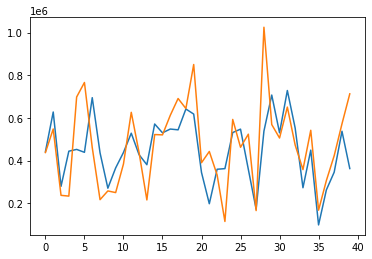

In [25]:
# data set that has large difference
random_data_rand1 = np.random.uniform(0,50, size=(200))
random_data_rand2 = np.random.uniform(800000,1000000, size=(200))

random_data_diff = np.concatenate((random_data_rand1 ,random_data_rand2))
np.random.shuffle(random_data_diff )
random_data_diff = random_data_diff.reshape(40,10,1)
plt.plot(range(40),np.mean(random_data_diff, axis=1),range(40), mean_LSTMmodel.predict(random_data_diff))

In [72]:
mean_LSTMmodel.save("./LSTMfinalMeanarbgood.h5")

# STD Model

In [199]:
# low_float = list(range(1,200))
# #random_data1 = (np.random.normal(20,6,200000)).reshape(20000,10,1)
# #sample1 = random.choices(low_float, k = 10)
# random_data1 = []
# for i in range(20000):
#     random_data1.append(random.choices(low_float, k = 10))
# random_data1 = np.array(random_data1)
# random_data1 = random_data1.reshape(10000,20,1)


std_data1 = Std(random_data1)
mean_data1 = Mean(random_data1)
std_data2 = Std(random_data2)
std_data3 = Std(random_data3)
std_data4 = Std(random_data4)
std_data5 = Std(random_data5)
std_data6 = Std(random_data6)
std_data7 = Std(random_data7)
std_data8 = Std(random_data8)
std_data9 = Std(random_data9)

#ddd = tf.concat([d1,d2],axis=0)
f_ddd = tf.concat([std_data1,std_data2,std_data3,std_data4,std_data5,std_data6],axis=0)
# std_data10 = Std(random_data10)
#std_data_stdweight = Std(random_data_stdweight)
print(f_ddd.shape)

(12000, 1)


In [ ]:
# special_value = -10.0
# max_seq_len = max(dd)
# Xpad = np.full((N, dd, 1), fill_value=special_value)
# for s, x in enumerate(X):
#     seq_len = x.shape[0]
#     Xpad[s, 0:seq_len, :] = x

In [38]:

std_LSTMmodel = Sequential()
std_LSTMmodel.add(Input(shape=[None, 1], ragged=True))
#std_LSTMmodel.add(Masking(0, input_shape=(10, 1)))

#std_LSTMmodel.add(Masking(mask_value=0, input_shape=(None, 1)))

std_LSTMmodel.add(LSTM(64,input_dim=1,activation='relu', return_sequences = False))


std_LSTMmodel.add(Dropout(0.00001))



# std_LSTMmodel.add(LSTM(64,activation='relu', return_sequences = False))


# std_LSTMmodel.add(Dropout(0.00001))
# std_LSTMmodel.add(LSTM(128,activation='relu', return_sequences = False))

# std_LSTMmodel.add(Dropout(0.00001))

#std_LSTMmodel.add(TimeDistributed(Dense(1, activation ='linear')))

std_LSTMmodel.add(Dense(1, activation ='linear'))



# std_LSTMmodel = Sequential()

# std_LSTMmodel.add(LSTM(64,input_shape=(50,1),activation='relu', return_sequences = False))

# std_LSTMmodel.add(Dropout(0.2))
# std_LSTMmodel.add(Dense(16, activation ='relu'))
# std_LSTMmodel.add(Dropout(0.2))
# std_LSTMmodel.add(Dense(1, activation ='linear'))


In [83]:

def train_generator():
    while True:
        sequence_length = np.random.randint(2, 100)
        x_train = np.random.random((1000, sequence_length, 1))
        # y_train will depend on past 5 timesteps of x
        y_train = x_train[:, :, 0]
        for i in range(1, 5):
            y_train[:, i:] += x_train[:, :-i, i]
        y_train = to_categorical(y_train > 2.5)
        print(x_train)
        print(y_train)
        yield x_train, y_train

In [84]:
train_generator()

<generator object train_generator at 0x2b3453fa1eb0>

In [86]:
#clipvalue=0.0001
optimizer = keras.optimizers.Adam(clipvalue=0.0001)
std_LSTMmodel.compile(optimizer=optimizer, loss="mse")

In [87]:
#std_LSTMmodel = load_model('./LSTMfinalStdverynice.h5')

In [8]:
#checkpoint = keras.callbacks.ModelCheckpoint('./LSTMfinalStd106.h5', save_freq='epoch' ) 

#std_LSTMmodel.fit(dd, f_dd, epochs=500, batch_size=128, callbacks=[checkpoint])


#std_LSTMmodel.fit(ddd, f_ddd, epochs=500, batch_size=128)
#std_LSTMmodel.fit(random_data_diff, std_random_data_diff, epochs=500, batch_size=64)
#std_LSTMmodel.fit_generator(train_generator(), steps_per_epoch=30,  epochs=500)

#std_LSTMmodel.fit(random_data_stdweight, std_data_stdweight, epochs= 100)

#std_LSTMmodel.fit(random_data1, std_data1,batch_size=128, epochs= 400)
#std_LSTMmodel.fit(random_data2, std_data2, epochs= 100)
#std_LSTMmodel.fit(random_data3, std_data3, epochs= 100)
#std_LSTMmodel.fit(random_data4, std_data4, epochs= 100)
#std_LSTMmodel.fit(random_data5, std_data5, epochs= 100)
#std_LSTMmodel.fit(random_data6, std_data6, epochs= 100)
#std_LSTMmodel.fit(random_data7, std_data7, epochs= 100)
#std_LSTMmodel.fit(random_data8, std_data8, epochs= 100)
#std_LSTMmodel.fit(random_data9, std_data9, epochs= 100)
#std_LSTMmodel.fit(random_data10, std_data10, epochs= 100)

In [9]:

#plt.plot(range(30),np.std(Predirect_arr1, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr1))
#plt.plot(range(30),np.std(Predirect_arr2, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr2))
#plt.plot(range(30),np.std(Predirect_arr3, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr3))
#plt.plot(range(30),np.std(Predirect_arr4, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr4))
#plt.plot(range(30),np.std(Predirect_arr5, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr5))
#plt.plot(range(30),np.std(Predirect_arr6, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr6))
#plt.plot(range(30),np.std(Predirect_arr7, axis=1),range(30), std_LSTMmodel.predict(Predirect_arr7))

In [146]:
#data set that has large difference
random_data_rand1 = np.random.uniform(30,80, size=(600))
random_data_rand2 = np.random.uniform(80,120, size=(600))
random_data_diff = np.concatenate((random_data_rand1 ,random_data_rand2))
np.random.shuffle(random_data_diff )
random_data_diff = random_data_diff.reshape(20,60,1)
mean_random_data_diff = Mean(random_data_diff)
std_random_data_diff = Std(random_data_diff)


#plt.plot(range(20),np.std(random_data_diff, axis=1),range(20), std_LSTMmodel.predict(random_data_diff))

In [16]:
# t1 = (np.random.normal(1000,20,300)).reshape(30,10,1)
# plt.plot(range(30),np.std(t1, axis=1),range(30), std_LSTMmodel.predict(t1))

In [145]:
std_LSTMmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 10, 80)            26240     
                                                                 
 dropout_12 (Dropout)        (None, 10, 80)            0         
                                                                 
 lstm_14 (LSTM)              (None, 128)               107008    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________


In [48]:
std_LSTMmodel.evaluate(Predirect_arr4,np.std(Predirect_arr4, axis=1) )

1/1 [==============================] - 0s 176ms/step - loss: 134.3336


134.3335723876953

In [100]:
std_LSTMmodel.save("./LSTMfinalStdarb1.h5")

In [34]:
std_LSTMmodel = load_model('./LSTMfinalStdverygood1.h5')

# Mean STD Both

In [98]:

input_layer = Input(shape=[None,1], ragged=True)
first = LSTM(8, input_dim = 1, activation='relu', return_sequences = True)(input_layer)

D1 = Dropout(0.01)(first)

first_2 = LSTM(16, activation='relu', return_sequences = False)(D1)

D1_1 = Dropout(0.001)(first_2)

y1_output = Dense(units='1', activation='linear', name='mean_output')(D1_1)

second = LSTM(16,input_dim = 1, activation='relu', return_sequences = True)(input_layer)

D2 = Dropout(0.001)(second)

second_2 = LSTM(8, activation='relu', return_sequences = False)(D2)

D2_1 = Dropout(0.001)(second_2)



y2_output = Dense(units='1', activation='linear', name='std_output')(D2_1)

mean_std_model = Model(inputs=input_layer, outputs=[y1_output, y2_output])




In [99]:
mean_std_model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, None, 1)]    0           []                               
                                                                                                  
 lstm_70 (LSTM)                 (None, None, 8)      320         ['input_20[0][0]']               
                                                                                                  
 lstm_72 (LSTM)                 (None, None, 16)     1152        ['input_20[0][0]']               
                                                                                                  
 dropout_69 (Dropout)           (None, None, 8)      0           ['lstm_70[0][0]']                
                                                                                           

In [203]:
mean_std_model.compile(optimizer=keras.optimizers.Adam(clipvalue=0.0001), loss= ['mse','mse'])
mean_std_model.fit(ddd, [f_mddd,f_ddd], epochs= 200)

Epoch 1/200
375/375 [==============================] - 20s 45ms/step - loss: 5.4872 - mean_output_loss: 3.0255 - std_output_loss: 2.4617
Epoch 2/200
375/375 [==============================] - 17s 44ms/step - loss: 19.2478 - mean_output_loss: 3.0105 - std_output_loss: 16.2374
Epoch 3/200
375/375 [==============================] - 16s 44ms/step - loss: 22.3579 - mean_output_loss: 19.8332 - std_output_loss: 2.5247
Epoch 4/200
 79/375 [=====>........................] - ETA: 13s - loss: 7.3465 - mean_output_loss: 5.3990 - std_output_loss: 1.9475

KeyboardInterrupt: 

In [10]:
#plt.plot(range(30),np.mean(Predirect_arr1, axis=1),range(30),mean_std_model.predict(Predirect_arr1)[0])
#plt.plot(range(30),np.std(Predirect_arr1, axis=1),range(30),mean_std_model.predict(Predirect_arr1)[1])

#plt.plot(range(30),np.mean(Predirect_arr2, axis=1),range(30),mean_std_model.predict(Predirect_arr2)[0])
#plt.plot(range(30),np.std(Predirect_arr2, axis=1),range(30),mean_std_model.predict(Predirect_arr2)[1])

#plt.plot(range(30),np.mean(Predirect_arr3, axis=1),range(30),mean_std_model.predict(Predirect_arr3)[0])
#plt.plot(range(30),np.std(Predirect_arr3, axis=1),range(30),mean_std_model.predict(Predirect_arr3)[1])


#plt.plot(range(30),np.mean(Predirect_arr4, axis=1),range(30),mean_std_model.predict(Predirect_arr4)[0])
#plt.plot(range(30),np.std(Predirect_arr4, axis=1),range(30),mean_std_model.predict(Predirect_arr4)[1])

#plt.plot(range(30),np.mean(Predirect_arr7, axis=1),range(30),mean_std_model.predict(Predirect_arr7)[0])
#plt.plot(range(30),np.std(Predirect_arr7, axis=1),range(30),mean_std_model.predict(Predirect_arr7)[1])


#plt.plot(range(20),np.mean(random_data_diff, axis=1),range(20),mean_std_model.predict(random_data_diff)[0])
#plt.plot(range(20),np.std(random_data_diff, axis=1),range(20),mean_std_model.predict(random_data_diff)[1])



In [13]:
#mean_std_model.save("./LSTMfinalmeanstdarb33.h5")

In [14]:
#mean_std_model = load_model("./LSTMfinalmeanstdarbgood.h5")